In [1]:
%pip install matplotlib
%pip install ultralytics

import cv2
import numpy as np
import matplotlib.pyplot as plt

import sys
%pwd


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


'/Users/amy/code/homeplate/homeplate/python'

In [15]:
def get_resized_image_from_image_index(index=0):
    image_path = f'../images/test{index}.jpg'
    mat_bgr = cv2.imread(image_path)
    print(f"ORIGINAL: Image Width {mat_bgr.shape[1]} Height {mat_bgr.shape[0]}")
    
    scale = 4000 / mat_bgr.shape[1]
    mat_bgr = cv2.resize(mat_bgr, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)

    print(f"RESIZED: Image Width {mat_bgr.shape[1]} Height {mat_bgr.shape[0]}")

    return mat_bgr

def show_bgr_image(im):
    im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.imshow(im_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

def get_white_balanced_image(image):
    image = image.astype(np.float32)

    b, g, r = cv2.split(image)
    
    max_b, max_g, max_r = np.max(b), np.max(g), np.max(r)
    print(f"Max values - B: {max_b}, G: {max_g}, R: {max_r}")

    b = b * (255.0 / max_b)
    g = g * (255.0 / max_g)
    r = r * (255.0 / max_r)

    balanced_image = cv2.merge([b, g, r])
    balanced_image = np.clip(balanced_image, 0, 255).astype(np.uint8)

    return balanced_image



ORIGINAL: Image Width 1332 Height 996
RESIZED: Image Width 4000 Height 2991
Max values - B: 255.0, G: 255.0, R: 255.0


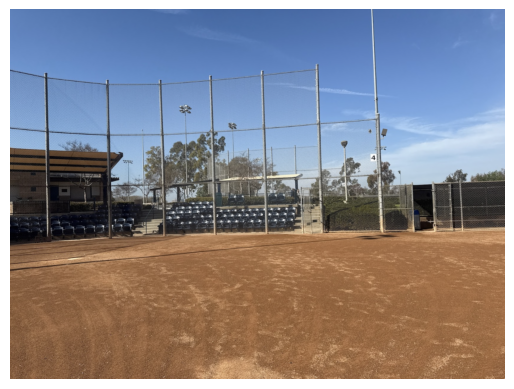

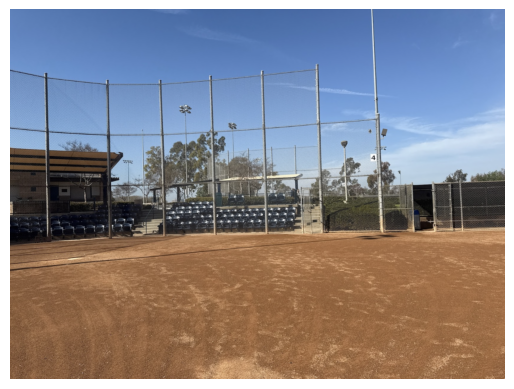

In [53]:
image = get_resized_image_from_image_index(3)
white_balanced = get_white_balanced_image(image)
show_bgr_image(image)
show_bgr_image(white_balanced)

In [63]:
def find_average_hsv_of_ground_region(mat_bgr): 
    hsv_image = cv2.cvtColor(mat_bgr, cv2.COLOR_BGR2HSV)

    height, width, _ = hsv_image.shape 
    # Assuming that the ground is in the lower 1/3 of the image
    roi = hsv_image[int(height / 3):height, 0:width] 
    average_hsv = cv2.mean(roi)  # Returns (B, G, R, A) for BGR, but we want HSV
    print(f'Average HSV: {average_hsv}')
    return average_hsv


In [54]:
def apply_hsv_filter(mat_bgr): 
    hsv_frame = cv2.cvtColor(mat_bgr, cv2.COLOR_BGR2HSV)
    # H, S, V 
    # Lower saturation captures more muted colors 
    # Higher values captures brighter shades 
    lower_bound = np.array([10, 20, 80])
    upper_bound = np.array([30, 255, 255])
    hsv_frame = cv2.inRange(hsv_frame, lower_bound, upper_bound)
    mat_bgr = cv2.resize(hsv_frame, None, fx=0.5, fy=0.5)

    # mat_bgr = cv2.cvtColor(mat_bgr, cv2.COLOR_HSV2BGR)
    return mat_bgr


ORIGINAL: Image Width 2042 Height 1038
RESIZED: Image Width 4000 Height 2033
Max values - B: 255.0, G: 255.0, R: 255.0


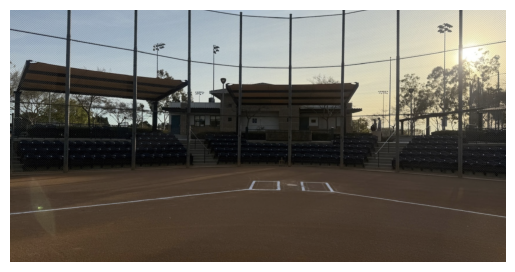

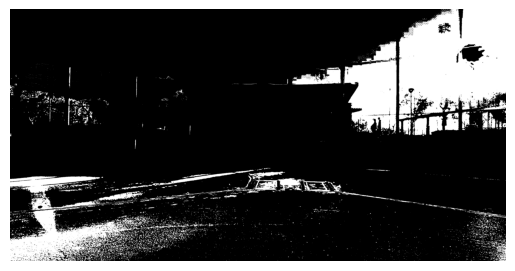

In [62]:
image = get_resized_image_from_image_index(9)
image = get_white_balanced_image(image)
hsv_image = apply_hsv_filter(image)
show_bgr_image(image)
show_bgr_image(hsv_image)

## What are the average HSV values of the lower 1/3 of the test images? 



In [64]:
# Finding the average HSV values for the test images 
for i in range(11):
    image = get_resized_image_from_image_index(i)
    find_average_hsv_of_ground_region(image)



ORIGINAL: Image Width 4000 Height 2252
RESIZED: Image Width 4000 Height 2252
Average HSV: (45.33699067909454, 84.09265396138483, 105.10213315579227, 0.0)
ORIGINAL: Image Width 900 Height 600
RESIZED: Image Width 4000 Height 2667
Average HSV: (41.43930793025872, 97.06145050618673, 110.42428430821148, 0.0)
ORIGINAL: Image Width 1244 Height 1098
RESIZED: Image Width 4000 Height 3531
Average HSV: (46.1096049277825, 77.38132901444351, 106.20987935429058, 0.0)
ORIGINAL: Image Width 1332 Height 996
RESIZED: Image Width 4000 Height 2991
Average HSV: (36.791450852557674, 99.88974899699097, 141.92262562688066, 0.0)
ORIGINAL: Image Width 1776 Height 986
RESIZED: Image Width 4000 Height 2221
Average HSV: (56.03792015530047, 84.72692910195813, 136.36640124915596, 0.0)
ORIGINAL: Image Width 1876 Height 978
RESIZED: Image Width 4000 Height 2085
Average HSV: (56.504804676259, 85.83727949640289, 138.01899856115108, 0.0)
ORIGINAL: Image Width 1280 Height 720
RESIZED: Image Width 4000 Height 2250
Average